<a href="https://colab.research.google.com/github/lcipolina/ML_Fundamentals/blob/main/Assignment1_Part1-BankNote-Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Part 1

Choose one data set from the machine learning repositories, perform data visualization, and indicate which algorithm will work best for this data set.

### Data visualization with dataset: Bank_Notes

Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load data and inspect the first rows

In [2]:
df = pd.read_csv ('BankNote_Authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Show summary statistics

In [3]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Data visualization

Visual inspection to see which cluster would fit the data better

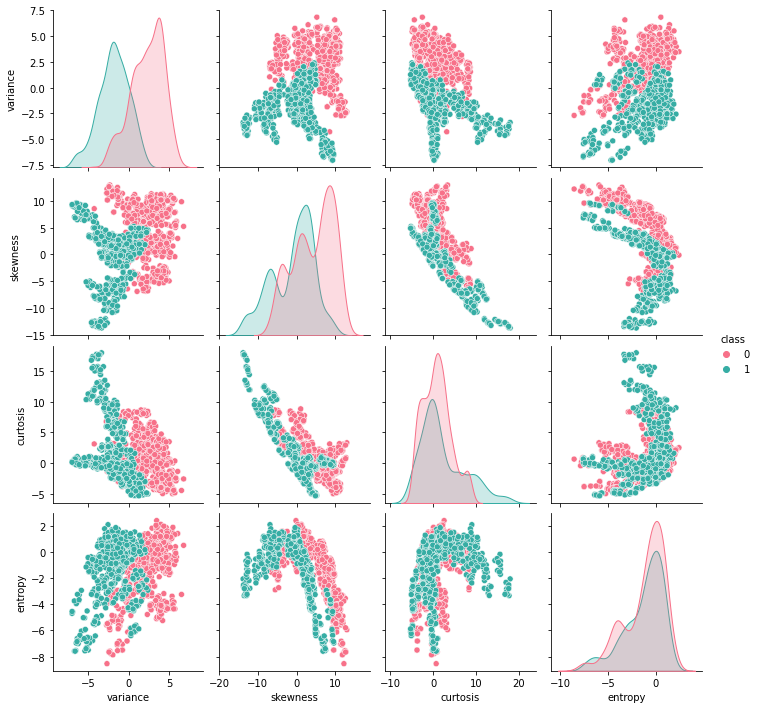

In [4]:
#Plot both scatter Plots and histohram with "pairplot"
sns.pairplot(df, hue="class", palette="husl")

### Clustering Algorithms

#### K-means

In [7]:
from sklearn.cluster import KMeans

# Instantiate object
nClusters = 4  #we have to arbitrarily select the number of desired clusters.
km = KMeans(n_clusters = nClusters)
km.fit_predict

# Create centers
y_predict = km.fit_predict(df[['variance', 'skewness']])
df['cluster'] = y_predict

# Instantiate the three clusters
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

Text(0.5, 1.0, 'K-Means of BankNote Authentication')

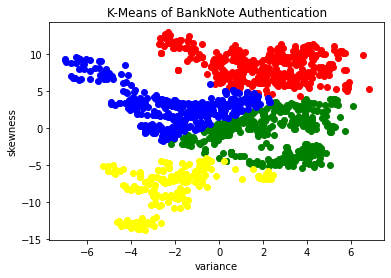

In [9]:
# Plot clusters in scatterplot
plt.scatter(df1.variance, df1['skewness'], color = 'green') 
plt.scatter(df2.variance, df2['skewness'], color = 'red')
plt.scatter(df3.variance, df3['skewness'], color = 'blue') 
plt.scatter(df4.variance, df4['skewness'], color = 'yellow')

#Labeling scatter plot
plt.xlabel('variance')
plt.ylabel('skewness')
plt.title('K-Means of BankNote Authentication')

#### DBSCAN

    1. It requires minimum domain knowledge.

    2. It can discover clusters of arbitrary shape.

    3. Efficient for large database, i.e. sample size more than few thousands.

##### Hyperparameters
**Epsilon parameter**
It is the furthest distance at which a point will pick its neighbours.

Therefore, intuitively this will decide how many neighbours a point will discover. 

*** Min Points****

Is the minimum number of points in the cluster (within an epsilon neighborhood distance)

1. If the database has data points that form clusters of varying density, then DBSCAN fails to cluster the data points well, since the clustering depends on ϵ and MinPts parameter, they cannot be chosen separately for all clusters.

2. If the data and features are not so well understood by a domain expert then, setting up ϵ and MinPts could be tricky and, may need comparisons for several iterations with different values of ϵ and MinPts.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


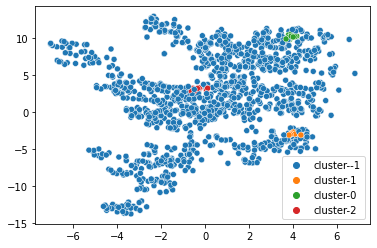

In [57]:
from sklearn.cluster import DBSCAN

data = df.values

#Hyperparameters
epsilon = 0.5
minSamples = 10
db = DBSCAN(eps=epsilon, min_samples=minSamples).fit(data)

labels = db.labels_
sns.scatterplot(data[:,0], data[:,1], hue=["cluster-{}".format(x) for x in labels])



### Sensitivity analysis (i.e. ablation study) of the epsilon value

As expected, the bigger the value of epsilon, the less number of clusters we have.

In sklearn, the noise data is labeled as "cluster -1" and "cluster --1". We can see that if the epsilon is too smalll, we have too many outliers.

An epsilon of 5 seems to be the sweet spot where we have distinguishable clusters and not too many outliers.

0.5
1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1.5
2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


3
5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


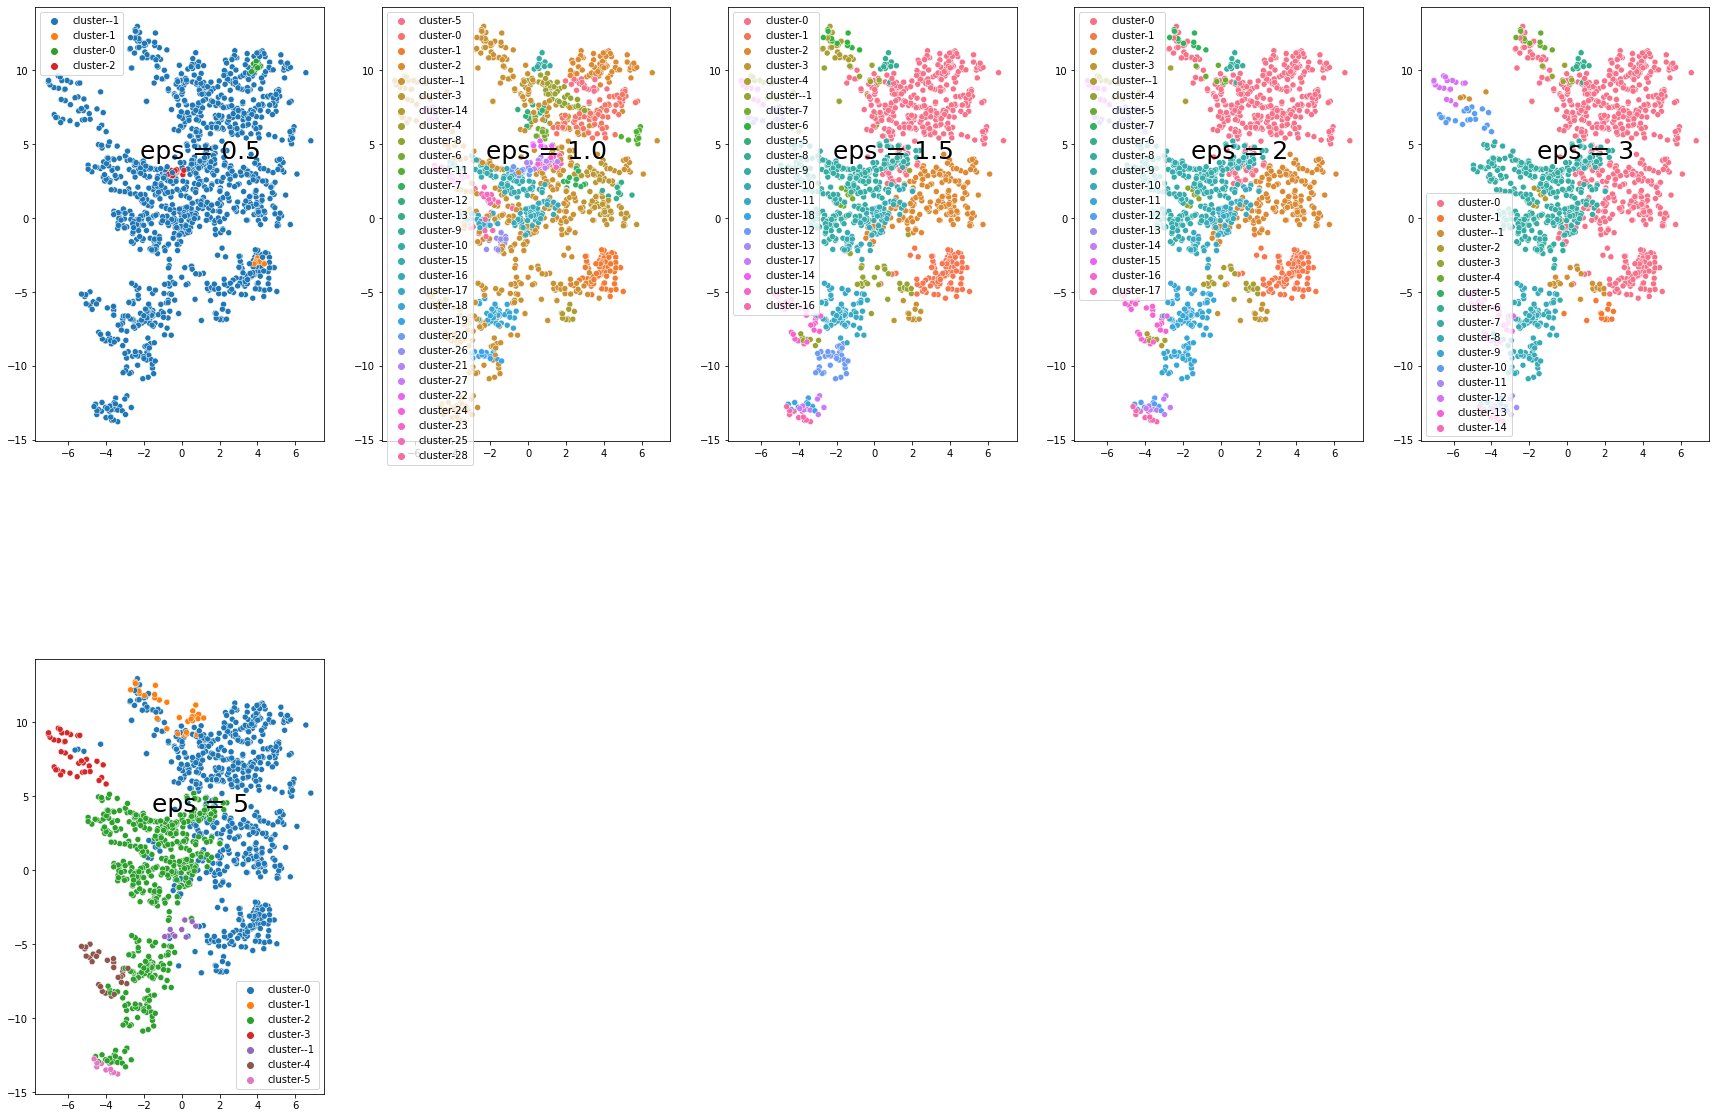

In [60]:

fig = plt.figure(figsize=(30, 20))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1
for x in [0.5,1.0,1.5,2,3,5]:
    eps = x
    db = DBSCAN(eps=eps, min_samples=minSamples).fit(data)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    print(eps)
    ax = fig.add_subplot(2, 5, i)
    ax.text(1, 4, "eps = {}".format(round(eps, 1)), fontsize=25, ha="center")
    sns.scatterplot(data[:,0], data[:,1], hue=["cluster-{}".format(x) for x in labels])
    
    i += 1